## Fine-tuned BERT for hate speech detection ##

### Instructions

The data for the competition has been pre-partitioned into 3 sets: train,dev,test

The test data consists of two parts: public and private, the leaderboard will display the performance<br>
on the public part, and we will announce the final results on the private test set after 04/12/2024.<br>

*Files*

    train_2024.csv - the training set, 99000 rows
    dev_2024.csv - the development set, 11000 rows
    test_2024.csv - the test set, 12001 rows
    sample_submission_2024.csv - a sample submission file in the correct format

*Columns*

    id - column for the example_id within the set
    text - the text of the comment
    label - binary label (1=Toxic/0=NonToxic)


In [43]:
import pandas as pd
import numpy as np
import torch
import matplotlib.pyplot as plt
from transformers import BertTokenizer

In [36]:
if torch.cuda.is_available():
    device = torch.device("cuda")
    print('Running with %s, %d GPU available.' % (device, torch.cuda.device_count()))
    print('GPU:', torch.cuda.get_device_name(0))
else:
    print('No GPU, using CPU')
    device = torch.device("cpu")

Running with cuda, 1 GPU available.
GPU: NVIDIA GeForce RTX 2070 Super with Max-Q Design


In [ ]:
!pip install transformers

In [27]:
df = pd.read_csv("./train/train_2024.csv", quoting=3, index_col=0)

In [38]:
df.head(10)

,text,label
id,,
0,Except that Desmond played first base last nig...,0
1,What i find funny is the loyalty and blindness...,0
2,Read the article not just the headline & you ...,0
3,Speaking of a horses backside is that where y...,1
4,Michael Barone- gee are you dumb. No other wo...,1
5,too bad ignorant left wing sheep like you in t...,1
6,This is just another attempt to shut down spee...,1
7,Ugly American.....Trump's ugly presence and me...,1
8,Yep. Go be cannon fodder due to being born poo...,0


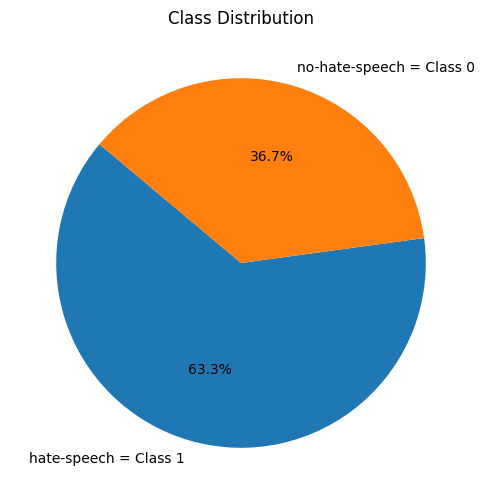

In [57]:
class_counts = df['label'].value_counts()
text = df.text.values

# Plot the pie chart
plt.figure(figsize=(8, 6))
plt.pie(class_counts, labels=['hate-speech = Class 1', 'no-hate-speech = Class 0'], autopct='%1.1f%%', startangle=140)
plt.title('Class Distribution')
plt.show()

In [60]:
tokenizer_cased = BertTokenizer.from_pretrained('bert-base-cased', do_lower_case=False)
#tokenizer_un_cased = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

In [61]:
print(' text: ', text[0])
print('tokenized: ', tokenizer_cased.tokenize(text[0]))
print('Token IDs: ', tokenizer_cased.convert_tokens_to_ids(tokenizer_cased.tokenize(text[0])))

 text:  Except that Desmond played first base last night. Tapia was in LF  and Reynolds had a night off.
tokenized:  ['Except', 'that', 'Desmond', 'played', 'first', 'base', 'last', 'night', '.', 'Ta', '##pia', 'was', 'in', 'L', '##F', 'and', 'Reynolds', 'had', 'a', 'night', 'off', '.']
Token IDs:  [9656, 1115, 17190, 1307, 1148, 2259, 1314, 1480, 119, 22515, 15748, 1108, 1107, 149, 2271, 1105, 9296, 1125, 170, 1480, 1228, 119]
